In [2]:
import pandas as pd # to load dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn.model_selection import train_test_split # for splitting dataset
from sklearn.preprocessing import MinMaxScaler # for scaling
from sklearn.linear_model import LogisticRegression # machine learning lib/model, # get accuracy by Logistic regression
from sklearn.tree import DecisionTreeClassifier # get accuracy by Decision Tree classifier
from sklearn.neighbors import KNeighborsClassifier # get accuracy by KNN classifier
from sklearn.naive_bayes import GaussianNB # get accuracy by GNB classifier
df=pd.read_csv('fruit.csv')
df.shape
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [3]:
print(df['fruit_name'].unique()) # unique fruits name

['  apple' ' apple' 'apple' 'mandarin' 'mandarin ' 'orange' 'lemon']


In [4]:
print(df['fruit_subtype'].unique()) # unique fruit subtype

[' granny_smith' 'granny_smith' 'mandarin' 'mandarin ' 'braeburn'
 'golden_delicious' 'cripps_pink' 'spanish_jumbo' 'selected_seconds'
 'urkey_navel' 'turkey_navel' 'spanish_belsan' 'unknown']


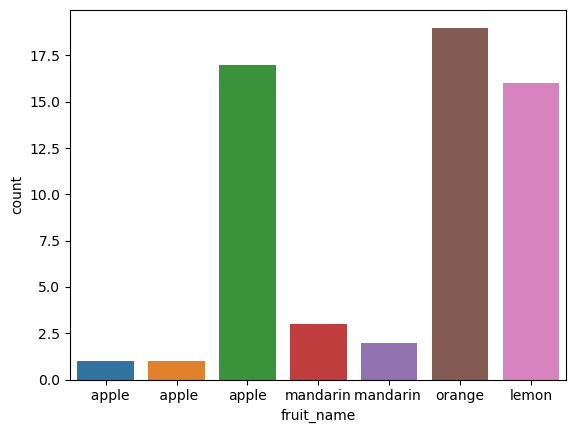

In [7]:
sns.countplot(x='fruit_name', data=df, label='Count')  # count plot
plt.show()

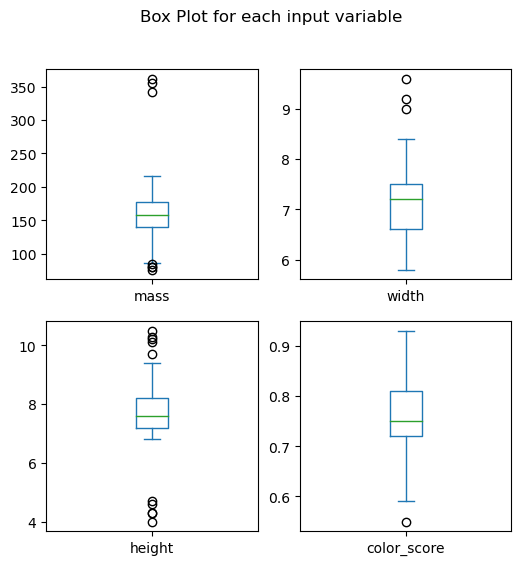

In [8]:
df.drop('fruit_label',axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(6,6), title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

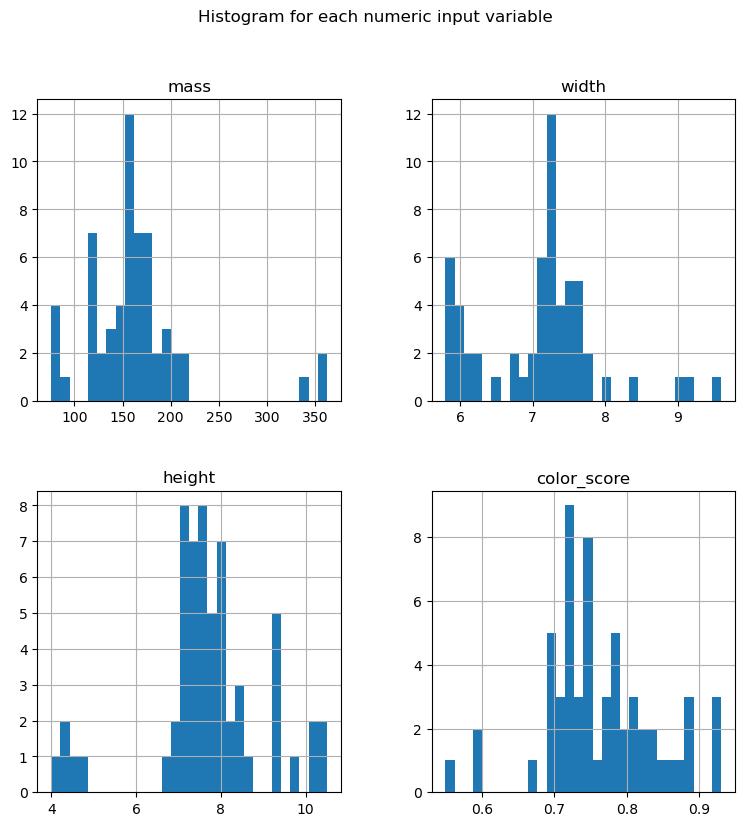

In [9]:
import pylab as pl
df.drop('fruit_label', axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')

<Axes: >

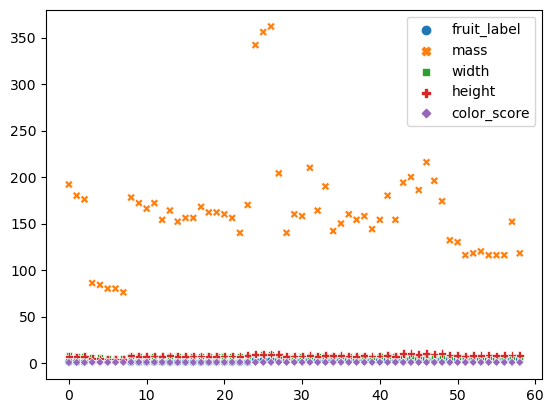

In [10]:
#scaterplot
sns.scatterplot(data=df)

In [11]:
#preparing data with scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
feature_names = ['mass', 'width', 'height', 'color_score']
x=df[feature_names]
y=df['fruit_label']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)
print(x_train[:3]) # to check output
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)
print("\nAfter scaling\n")
print(x_train[:3]) # to check output

    mass  width  height  color_score
42   154    7.2     7.2         0.82
48   174    7.3    10.1         0.72
7     76    5.8     4.0         0.81

After scaling

[[0.27857143 0.41176471 0.49230769 0.72972973]
 [0.35       0.44117647 0.93846154 0.45945946]
 [0.         0.         0.         0.7027027 ]]


In [12]:
from sklearn.linear_model import LogisticRegression # machine learning lib/model
feature_names = ['mass', 'width', 'height', 'color_score']
x=df[feature_names]
y=df['fruit_label']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)
#logistic regression
logreg = LogisticRegression() # machine learning algorithm
logreg.fit(x_train, y_train)
#print score of train data
print('Accuracy of Logistic regression classifier on training set:{:.2f}'
.format(logreg.score(x_train, y_train)))
#print score of test data
print('Accuracy of Logistic regression classifier on test set:{:.2f}'
.format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set:0.75
Accuracy of Logistic regression classifier on test set:0.47


In [13]:
from sklearn.neighbors import KNeighborsClassifier
# KNN method
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
#print score of train data
print('Accuracy of KNN classifier on training set:{:.2f}'
.format(knn.score(x_train, y_train)))
#print score of test data
print('Accuracy of KNN Classifier on test set:{:.2f}'
.format(knn.score(x_test, y_test)))

Accuracy of KNN classifier on training set:0.95
Accuracy of KNN Classifier on test set:1.00


In [14]:
from sklearn.svm import SVC
# SVM classifier
svm = SVC()
svm.fit(x_train, y_train)
#print score of train data
print('Accuracy of SVM classifier on training set:{:.2f}'
.format(svm.score(x_train, y_train)))
#print score of test data
print('Accuracy of SVM Classifier on test set:{:.2f}'
.format(svm.score(x_test, y_test)))

Accuracy of SVM classifier on training set:0.91
Accuracy of SVM Classifier on test set:0.80


In [15]:
data = {'Training Accuracy (in %)':[75,95,91],'Testing Accuracy (in %)':[47,100,80]}
df1 = pd.DataFrame(data, index =['Logistic Regression','K-Nearest Neighbour (KNN)','Support Vector Machine (SVM)'])
df1

,Training Accuracy (in %),Testing Accuracy (in %)
Logistic Regression,75,47
K-Nearest Neighbour (KNN),95,100
Support Vector Machine (SVM),91,80
